<a href="https://colab.research.google.com/github/mart1428/AFibPredictor/blob/main/AFib_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to predict if a person has a high chance in getting Atrial Fibrillation based on bloodworks. This is due to Atrial Fibrillation being a hard to detect and is usually detected when doing checkups.

###**From Kaggle:**
Content
Using Structured Query Language queries (PostgreSQL, version 9.6), demographic characteristics, vital signs, and laboratory values data were extracted from the following tables in the MIMIC III dataset: ADMISSIONS, PATIENTS, ICUSTAYS, D_ICD DIAGNOSIS, DIAGNOSIS_ICD, LABEVENTS, D_LABIEVENTS, CHARTEVENTS, D_ITEMS, NOTEEVENTS, and OUTPUTEVENTS. Based on previous studies 7-9 13-15, clinical relevance, and general availability at the time of presentation, we extracted the following data: demographic characteristics (age at the time of hospital admission, sex, ethnicity, weight, and height); vital signs (heart rate, (HR), systolic blood pressure [SBP], diastolic blood pressure [DBP], mean blood pressure, respiratory rate, body temperature, saturation pulse oxygen [SPO2], urine output [first 24 h]); comorbidities (hypertension, atrial fibrillation, ischemic heart disease, diabetes mellitus, depression, hypoferric anemia, hyperlipidemia, chronic kidney disease (CKD), and chronic obstructive pulmonary disease [COPD]); and laboratory variables (hematocrit, red blood cells, mean corpuscular hemoglobin [MCH], mean corpuscular hemoglobin concentration [MCHC], mean corpuscular volume [MCV], red blood cell distribution width [RDW], platelet count, white blood cells, neutrophils, basophils, lymphocytes, prothrombin time [PT], international normalized ratio [INR], NT-proBNP, creatine kinase, creatinine, blood urea nitrogen [BUN] glucose, potassium, sodium, calcium, chloride, magnesium, the anion gap, bicarbonate, lactate, hydrogen ion concentration [pH], partial pressure of CO2 in arterial blood, and LVEF), using Structured Query Language (SQL) with PostgreSQL (version 9.6). Demographic characteristics and vital signs extracted were recorded during the ﬁrst 24 hours of each admission and laboratory variables were measured during the entire ICU stay. Comorbidities were identified using ICD-9 codes. For variable data with multiple measurements, the calculated mean value was included for analysis.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [ ]:
data = pd.read_csv("https://docs.google.com/uc?export=download&id=1v7z6Lk0T4r7p58a-0PSUsjkcyecwe9X9")
print(data.head())

   group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.1625

In [ ]:
data.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

In [ ]:
data.dtypes

group                         int64
ID                            int64
outcome                     float64
age                           int64
gendera                       int64
BMI                         float64
hypertensive                  int64
atrialfibrillation            int64
CHD with no MI                int64
diabetes                      int64
deficiencyanemias             int64
depression                    int64
Hyperlipemia                  int64
Renal failure                 int64
COPD                          int64
heart rate                  float64
Systolic blood pressure     float64
Diastolic blood pressure    float64
Respiratory rate            float64
temperature                 float64
SP O2                       float64
Urine output                float64
hematocrit                  float64
RBC                         float64
MCH                         float64
MCHC                        float64
MCV                         float64
RDW                         

In [ ]:
data.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [ ]:
imputer = SimpleImputer(strategy = 'most_frequent')
cols = data.columns
data[cols] = imputer.fit_transform(data[cols])
data.isnull().sum()

group                       0
ID                          0
outcome                     0
age                         0
gendera                     0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT        

In [ ]:
drop_data_cols = ['group', 'ID', 'outcome',  'gendera',  'hypertensive', 'Urine output', 'temperature',
        'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD']
processed_data = data.drop(columns = drop_data_cols)

Index(['age', 'BMI', 'atrialfibrillation', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'SP O2', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV',
       'RDW', 'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils',
       'Lymphocyte', 'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF'],
      dtype='object')


<Axes: >

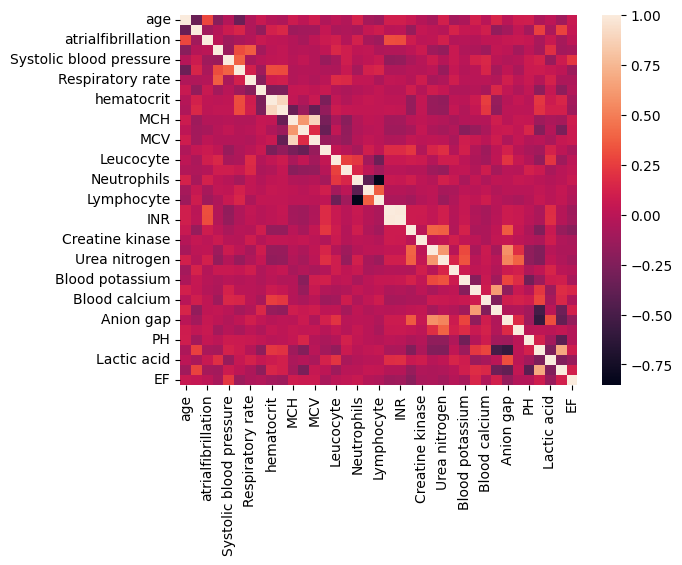

In [ ]:
print(processed_data.columns)
corrs = processed_data.corr()
sns.heatmap(corrs)

In [ ]:
corrs[['atrialfibrillation']].abs().sort_values('atrialfibrillation', ascending = False)

,atrialfibrillation
atrialfibrillation,1.000000
PT,0.316861
INR,0.310939
age,0.291003
Lymphocyte,0.118046
Systolic blood pressure,0.116720
Neutrophils,0.114078
BMI,0.111744
Urea nitrogen,0.108165
Leucocyte,0.098511


In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(processed_data.drop('atrialfibrillation', axis = 1), processed_data.atrialfibrillation, test_size = 0.2, random_state = 1000, stratify = processed_data.atrialfibrillation)
X_train.shape, y_train.shape

((941, 36), (941,))

In [ ]:
logreg = sklearn.linear_model.LogisticRegressionCV(max_iter = 5000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logreg.score(X_test, y_test)}')

Logistic Regression Training Score: 0.696068012752391
Logistic Regression Testing Score: 0.7076271186440678


In [ ]:
betas = pd.Series(logreg.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logreg.intercept_[0]})])
betas.sort_values()

Respiratory rate           -2.650822e-02
MCHC                       -2.050912e-02
Blood sodium               -1.669965e-02
Chloride                   -1.515472e-02
SP O2                      -1.184303e-02
Systolic blood pressure    -1.138362e-02
PCO2                       -1.120596e-02
MCH                        -1.065523e-02
Lymphocyte                 -9.513852e-03
Anion gap                  -7.266851e-03
Blood potassium            -4.016739e-03
Basophils                  -3.107299e-03
Lactic acid                -2.992217e-03
PH                         -1.519847e-03
BMI                        -1.489212e-03
Neutrophils                -1.155944e-03
RBC                        -8.298286e-04
Platelets                  -7.422269e-04
glucose                    -4.179051e-04
Intercept                  -4.089643e-04
Creatine kinase            -1.004589e-05
NT-proBNP                   6.539536e-07
Creatinine                  7.102560e-04
Magnesium ion               7.987071e-04
Bicarbonate     

In [ ]:
logregl1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.5844845908607864
Logistic Regression Testing Score: 0.6313559322033898


In [ ]:
betas = pd.Series(logregl1.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl1.intercept_[0]})])
betas.sort_values()

Systolic blood pressure    -3.421180e-03
PCO2                       -1.273387e-03
Diastolic blood pressure   -1.090432e-03
glucose                    -9.603734e-04
Lymphocyte                 -8.821691e-04
BMI                        -8.670441e-04
Platelets                  -5.650118e-04
Blood sodium               -4.341638e-04
heart rate                 -1.427668e-04
SP O2                      -1.208158e-04
Bicarbonate                -1.191866e-04
MCV                        -1.176862e-04
Chloride                   -9.701047e-05
MCHC                       -7.551216e-05
Respiratory rate           -7.273726e-05
MCH                        -5.316279e-05
Intercept                  -2.686847e-05
Blood potassium             0.000000e+00
PH                          0.000000e+00
Magnesium ion               0.000000e+00
Anion gap                   0.000000e+00
RBC                         0.000000e+00
Creatinine                  0.000000e+00
Blood calcium               0.000000e+00
RDW             

In [ ]:
logregl2 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.5844845908607864
Logistic Regression Testing Score: 0.6313559322033898


In [ ]:
betas = pd.Series(logregl2.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl2.intercept_[0]})])
betas.sort_values()

Systolic blood pressure    -0.003051
PCO2                       -0.001580
Diastolic blood pressure   -0.001387
Lymphocyte                 -0.001291
BMI                        -0.001267
glucose                    -0.000962
Blood sodium               -0.000624
Platelets                  -0.000571
Bicarbonate                -0.000485
Respiratory rate           -0.000311
SP O2                      -0.000304
MCHC                       -0.000300
Chloride                   -0.000286
MCH                        -0.000218
MCV                        -0.000207
heart rate                 -0.000179
Basophils                  -0.000057
Blood potassium            -0.000049
Creatinine                 -0.000033
PH                         -0.000025
Intercept                  -0.000004
RBC                         0.000004
NT-proBNP                   0.000008
Creatine kinase             0.000017
Magnesium ion               0.000023
Blood calcium               0.000037
RDW                         0.000060
A

---
##**Second Iteration**
---

In [ ]:
drop_data_cols = ['group', 'ID', 'outcome',  'gendera',  'hypertensive', 'Urine output', 'temperature','Magnesium ion','PH', 'glucose',
        'CHD with no MI', 'diabetes', 'deficiencyanemias', 'Blood potassium', 'Anion gap','RBC', 'Blood calcium','Creatinine','RDW','Basophils', 'NT-proBNP', 'Creatine kinase', 'BMI', 'Platelets', 'Neutrophils',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD']
processed_data = data.drop(columns = drop_data_cols)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(processed_data.drop('atrialfibrillation', axis = 1), processed_data.atrialfibrillation, test_size = 0.2, random_state = 1000, stratify = processed_data.atrialfibrillation)
X_train.shape, y_train.shape

((941, 21), (941,))

In [ ]:
logreg = sklearn.linear_model.LogisticRegressionCV(max_iter = 5000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logreg.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7024442082890542
Logistic Regression Testing Score: 0.7033898305084746


In [ ]:
betas = pd.Series(logreg.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logreg.intercept_[0]})])
betas.sort_values()

Intercept                  -2.492768
Respiratory rate           -0.029327
MCHC                       -0.023141
MCH                        -0.012755
Chloride                   -0.012414
Systolic blood pressure    -0.012216
Blood sodium               -0.012045
PCO2                       -0.011816
Lymphocyte                 -0.007643
Lactic acid                -0.006632
SP O2                      -0.003068
Bicarbonate                 0.003301
heart rate                  0.005996
hematocrit                  0.006976
MCV                         0.008040
INR                         0.008306
Urea nitrogen               0.008354
Diastolic blood pressure    0.016029
EF                          0.016917
Leucocyte                   0.019985
age                         0.053481
PT                          0.088130
dtype: float64

In [ ]:
logregl1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7056323060573858
Logistic Regression Testing Score: 0.690677966101695


In [ ]:
betas = pd.Series(logregl1.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl1.intercept_[0]})])
betas.sort_values()

Intercept                  -0.144624
MCHC                       -0.070131
Respiratory rate           -0.037891
Blood sodium               -0.015546
Chloride                   -0.014823
PCO2                       -0.011872
Systolic blood pressure    -0.011836
Lymphocyte                 -0.006810
SP O2                      -0.005640
INR                         0.000000
Lactic acid                 0.000000
Bicarbonate                 0.000000
MCH                         0.000000
hematocrit                  0.002384
MCV                         0.003492
heart rate                  0.005794
Urea nitrogen               0.007623
Diastolic blood pressure    0.017329
EF                          0.017860
Leucocyte                   0.021577
age                         0.056241
PT                          0.104089
dtype: float64

In [ ]:
logregl2 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7056323060573858
Logistic Regression Testing Score: 0.690677966101695


In [ ]:
betas = pd.Series(logregl2.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl2.intercept_[0]})])
betas.sort_values()

MCHC                       -0.074174
Respiratory rate           -0.046133
Lactic acid                -0.041384
MCH                        -0.024842
Chloride                   -0.016791
PCO2                       -0.016094
Blood sodium               -0.015683
Systolic blood pressure    -0.012379
SP O2                      -0.011727
Lymphocyte                 -0.007442
Intercept                  -0.004690
INR                         0.002150
Bicarbonate                 0.003868
heart rate                  0.007060
hematocrit                  0.007283
Urea nitrogen               0.008221
MCV                         0.017184
Diastolic blood pressure    0.019043
EF                          0.019522
Leucocyte                   0.027816
age                         0.057908
PT                          0.106368
dtype: float64

---
##**Third Iteration**
---

In [ ]:
drop_data_cols = ['group', 'ID', 'outcome',  'gendera',  'hypertensive', 'Urine output', 'temperature','Magnesium ion','PH', 'glucose', 'INR', 'Lactic acid', 'Bicarbonate', 'MCH',
        'CHD with no MI', 'diabetes', 'deficiencyanemias', 'Blood potassium', 'Anion gap','RBC', 'Blood calcium','Creatinine','RDW','Basophils', 'NT-proBNP', 'Creatine kinase', 'BMI', 'Platelets', 'Neutrophils',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD']
processed_data = data.drop(columns = drop_data_cols)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(processed_data.drop('atrialfibrillation', axis = 1), processed_data.atrialfibrillation, test_size = 0.2, random_state = 1000, stratify = processed_data.atrialfibrillation)
X_train.shape, y_train.shape

((941, 17), (941,))

In [ ]:
logreg = sklearn.linear_model.LogisticRegressionCV(max_iter = 5000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logreg.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7013815090329437
Logistic Regression Testing Score: 0.711864406779661


In [ ]:
betas = pd.Series(logreg.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logreg.intercept_[0]})])
betas.sort_values()

Intercept                  -1.905877
MCHC                       -0.111452
Respiratory rate           -0.048159
Chloride                   -0.023770
PCO2                       -0.015836
Systolic blood pressure    -0.012159
Lymphocyte                 -0.007715
Blood sodium               -0.002959
SP O2                       0.003866
heart rate                  0.007456
hematocrit                  0.008019
Urea nitrogen               0.008043
MCV                         0.012910
Diastolic blood pressure    0.019817
EF                          0.020309
Leucocyte                   0.028328
age                         0.058781
PT                          0.109860
dtype: float64

In [ ]:
logregl1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7056323060573858
Logistic Regression Testing Score: 0.690677966101695


In [ ]:
betas = pd.Series(logregl1.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl1.intercept_[0]})])
betas.sort_values()

Intercept                  -0.290801
MCHC                       -0.069417
Respiratory rate           -0.037795
Blood sodium               -0.015201
Chloride                   -0.014919
PCO2                       -0.011841
Systolic blood pressure    -0.011836
Lymphocyte                 -0.006808
SP O2                      -0.004893
hematocrit                  0.002455
MCV                         0.003524
heart rate                  0.005817
Urea nitrogen               0.007633
Diastolic blood pressure    0.017344
EF                          0.017860
Leucocyte                   0.021578
age                         0.056248
PT                          0.104124
dtype: float64

In [ ]:
logregl2 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7056323060573858
Logistic Regression Testing Score: 0.690677966101695


In [ ]:
betas = pd.Series(logregl2.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl2.intercept_[0]})])
betas.sort_values()

MCHC                       -0.085589
Respiratory rate           -0.046385
Chloride                   -0.019812
PCO2                       -0.014474
Systolic blood pressure    -0.012231
Blood sodium               -0.011145
SP O2                      -0.011118
Lymphocyte                 -0.007692
Intercept                  -0.004011
hematocrit                  0.006660
heart rate                  0.006919
Urea nitrogen               0.008045
MCV                         0.009241
Diastolic blood pressure    0.018961
EF                          0.019501
Leucocyte                   0.026313
age                         0.057785
PT                          0.106231
dtype: float64

---
##**Fourth Iteration**
---

In [ ]:
drop_data_cols = ['group', 'ID', 'outcome',  'gendera',  'hypertensive', 'Urine output', 'temperature','Magnesium ion','PH', 'glucose', 'INR', 'Lactic acid', 'Bicarbonate', 'MCH', 'hematocrit', 'heart rate', 'Urea nitrogen', 'SP O2',
        'CHD with no MI', 'diabetes', 'deficiencyanemias', 'Blood potassium', 'Anion gap','RBC', 'Blood calcium','Creatinine','RDW','Basophils', 'NT-proBNP', 'Creatine kinase', 'BMI', 'Platelets', 'Neutrophils',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'Blood sodium']
processed_data = data.drop(columns = drop_data_cols)

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(processed_data.drop('atrialfibrillation', axis = 1), processed_data.atrialfibrillation, test_size = 0.2, random_state = 1000, stratify = processed_data.atrialfibrillation)
X_train.shape, y_train.shape

((941, 12), (941,))

In [ ]:
logreg = sklearn.linear_model.LogisticRegressionCV(max_iter = 5000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logreg.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logreg.score(X_test, y_test)}')

Logistic Regression Training Score: 0.7098831030818279
Logistic Regression Testing Score: 0.711864406779661


In [ ]:
betas = pd.Series(logreg.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logreg.intercept_[0]})])
betas.sort_values()

Intercept                  -2.380937
MCHC                       -0.078619
Respiratory rate           -0.036866
Chloride                   -0.020048
PCO2                       -0.014018
Systolic blood pressure    -0.013666
Lymphocyte                 -0.010943
MCV                         0.013230
EF                          0.017756
Diastolic blood pressure    0.022735
Leucocyte                   0.032777
age                         0.058362
PT                          0.107406
dtype: float64

In [ ]:
logregl1 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l1', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.71413390010627
Logistic Regression Testing Score: 0.7203389830508474


In [ ]:
betas = pd.Series(logregl1.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl1.intercept_[0]})])
betas.sort_values()

Intercept                  -0.329471
MCHC                       -0.127024
Respiratory rate           -0.040394
Chloride                   -0.024281
PCO2                       -0.016971
Systolic blood pressure    -0.013615
Lymphocyte                 -0.010897
MCV                         0.014491
EF                          0.018488
Diastolic blood pressure    0.022328
Leucocyte                   0.033678
age                         0.058467
PT                          0.109238
dtype: float64

In [ ]:
logregl2 = sklearn.linear_model.LogisticRegressionCV(penalty = 'l2', solver = 'saga', max_iter = 10000).fit(X_train, y_train)
print(f'Logistic Regression Training Score: {logregl1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {logregl1.score(X_test, y_test)}')

Logistic Regression Training Score: 0.71413390010627
Logistic Regression Testing Score: 0.7203389830508474


In [ ]:
betas = pd.Series(logregl2.coef_[0], index = X_train.columns)
betas = pd.concat([betas, pd.Series({'Intercept' : logregl2.intercept_[0]})])
betas.sort_values()

MCHC                       -0.136600
Respiratory rate           -0.041953
Chloride                   -0.025309
PCO2                       -0.017631
Systolic blood pressure    -0.013723
Lymphocyte                 -0.011041
Intercept                  -0.007276
MCV                         0.015505
EF                          0.018832
Diastolic blood pressure    0.022740
Leucocyte                   0.034675
age                         0.058768
PT                          0.109739
dtype: float64